In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")

In [2]:
energy_df_temp = pd.read_csv("energy_dataset.csv")
weather_features_temp = pd.read_csv("weather_features.csv")

energy_df = pd.DataFrame(energy_df_temp)
weather_features = pd.DataFrame(weather_features_temp)

In [3]:
energy_df.shape
energy_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [4]:
energy_df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [5]:
total_null_and_zero = energy_df.isnull().sum() + energy_df.eq(0).sum()
total_null_and_zero

time                                               0
generation biomass                                23
generation fossil brown coal/lignite           10535
generation fossil coal-derived gas             35064
generation fossil gas                             19
generation fossil hard coal                       21
generation fossil oil                             22
generation fossil oil shale                    35064
generation fossil peat                         35064
generation geothermal                          35064
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption    12626
generation hydro run-of-river and poundage        22
generation hydro water reservoir                  21
generation marine                              35064
generation nuclear                                20
generation other                                  22
generation other renewable                        21
generation solar                              

In [6]:
filtered_total_null_and_zero = total_null_and_zero[total_null_and_zero>15000]
filtered_total_null_and_zero

generation fossil coal-derived gas            35064
generation fossil oil shale                   35064
generation fossil peat                        35064
generation geothermal                         35064
generation hydro pumped storage aggregated    35064
generation marine                             35064
generation wind offshore                      35064
forecast wind offshore eday ahead             35064
dtype: int64

In [7]:
energy_df.drop(columns=filtered_total_null_and_zero.index, inplace=True)
energy_df.shape

(35064, 21)

In [8]:
columns_to_check = energy_df.columns.difference(['time']) 
duplicates = energy_df.duplicated(subset=columns_to_check).sum()
print("Количество дубликатов по всем колонкам кроме времени -", duplicates)

Количество дубликатов по всем колонкам кроме времени - 0


In [9]:
energy_df.head()


,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


# Описание колонок в DataFrame
Датасет содержит данные о потреблении, производстве и ценах электроэнергии в Испании за 4 года.
- <span style="color: #3498db">time</span>: Дата и время в формате CET
- <span style="color: #3498db">generation biomass</span>: Биомассовая генерация в МВт
- <span style="color: #3498db">generation fossil brown coal/lignite</span>: Генерация угля/лигнита в МВт
- <span style="color: #3498db">generation fossil gas</span>: Генерация газа в МВт
- <span style="color: #3498db">generation fossil hard coal</span>: Генерация твердого угля в МВт
- <span style="color: #3498db">generation fossil oil</span>: Генерация нефти в МВт
- <span style="color: #3498db">generation hydro pumped storage consumption</span>: Генерация гидро-насосного хранилища в МВт
- <span style="color: #3498db">generation hydro run-of-river and poundage</span>: Генерация гидро-течения и плотины в МВт
- <span style="color: #3498db">generation hydro water reservoir</span>: Генерация гидро-водохранилища в МВт
- <span style="color: #3498db">generation nuclear</span>: Генерация ядерной энергии в МВт
- <span style="color: #3498db">generation other</span>: Генерация других источников в МВт
- <span style="color: #3498db">generation other renewable</span>: Генерация других возобновляемых источников в МВт
- <span style="color: #3498db">generation solar</span>: Солнечная генерация в МВт
- <span style="color: #3498db">generation waste</span>: Генерация отходов в МВт
- <span style="color: #3498db">generation wind onshore</span>: Ветровая генерация на суше в МВт
- <span style="color: #3498db">forecast solar day ahead</span>: Прогноз солнечной генерации на следующий день
- <span style="color: #3498db">forecast wind onshore day ahead</span>: Прогноз ветровой генерации на суше на следующий день
- <span style="color: #3498db">total load forecast</span>: Прогноз общей нагрузки
- <span style="color: #3498db">total load actual</span>: Фактическая общая нагрузка
- <span style="color: #3498db">price day ahead</span>: Прогноз цены в EUR/МВт-ч
- <span style="color: #3498db">price actual</span>: Фактическая цена в EUR/МВт-ч


In [10]:
energy_df.rename(columns = {'generation biomass':'generation_biomass',
                            'generation fossil brown coal/lignite':'generation_fossil_brown',
                            'generation fossil gas':'generation_fossil_gas',
                            'generation fossil hard coal':'generation_fossil_hard_coal',
                            'generation fossil oil':'generation_fossil_oil',
                            'generation hydro pumped storage consumption':'generation_hydro_pumped_storage_consumption',
                            'generation hydro run-of-river and poundage':'generation_hydro_run_of_river_poundage',
                            'generation hydro water reservoir':'generation_hydro_water_reservoir',
                            'generation nuclear':'generation_nuclear',
                            'generation other':'generation_other',
                            'generation other renewable':'generation_other_renewable',
                            'generation solar':'generation_solar',
                            'generation waste':'generation_waste',
                            'generation wind onshore':'generation_wind_onshore',
                            'forecast solar day ahead':'forecast_solar_day_ahead',
                            'forecast wind onshore day ahead':'forecast_wind_onshore_day_ahead',
                            'total load forecast':'total_load_forecast',
                            'total load actual':'total_load_actual',
                            'price day ahead':'price_day_ahead',
                            'price actual':'price_actual'}, inplace = True)

In [11]:
energy_df.head(20)

,time,generation_biomass,generation_fossil_brown,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run_of_river_poundage,generation_hydro_water_reservoir,generation_nuclear,...,generation_other_renewable,generation_solar,generation_waste,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04
5,2015-01-01 05:00:00+01:00,410.0,178.0,4038.0,3590.0,156.0,2109.0,952.0,743.0,7098.0,...,74.0,34.0,188.0,4618.0,4.0,4617.0,21441.0,19905.0,35.72,53.63
6,2015-01-01 06:00:00+01:00,401.0,172.0,4040.0,3368.0,158.0,2108.0,961.0,848.0,7098.0,...,74.0,34.0,186.0,4397.0,3.0,4276.0,21285.0,20010.0,35.13,51.73
7,2015-01-01 07:00:00+01:00,408.0,172.0,4030.0,3208.0,160.0,2031.0,983.0,1012.0,7099.0,...,72.0,35.0,189.0,3992.0,12.0,3994.0,21545.0,20377.0,36.22,51.43
8,2015-01-01 08:00:00+01:00,413.0,177.0,4052.0,3335.0,161.0,2119.0,1001.0,1015.0,7098.0,...,73.0,54.0,198.0,3629.0,39.0,3602.0,21443.0,20094.0,32.40,48.98
9,2015-01-01 09:00:00+01:00,419.0,177.0,4137.0,3437.0,163.0,2170.0,1041.0,1357.0,7097.0,...,74.0,743.0,198.0,3073.0,784.0,3212.0,21560.0,20637.0,36.60,54.20


In [12]:
df_num = energy_df.select_dtypes(include = ["float64", "int64"])
energy_df['time'] = pd.to_datetime(energy_df['time'],utc=True).dt.normalize()
energy_df.to_csv("ready_energy_dataset.csv")

energy_df['year'] = pd.to_datetime(energy_df['time']).dt.year
energy_df['date'] = pd.to_datetime(energy_df['time']).dt.date
date = energy_df[["date","year"]]
energy_df = pd.concat([date, df_num], axis=1).copy()
energy_df.head(5)

,date,year,generation_biomass,generation_fossil_brown,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run_of_river_poundage,generation_hydro_water_reservoir,...,generation_other_renewable,generation_solar,generation_waste,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual
0,2014-12-31,2014,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,...,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01,2015,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,...,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01,2015,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,...,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01,2015,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,...,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01,2015,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,...,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


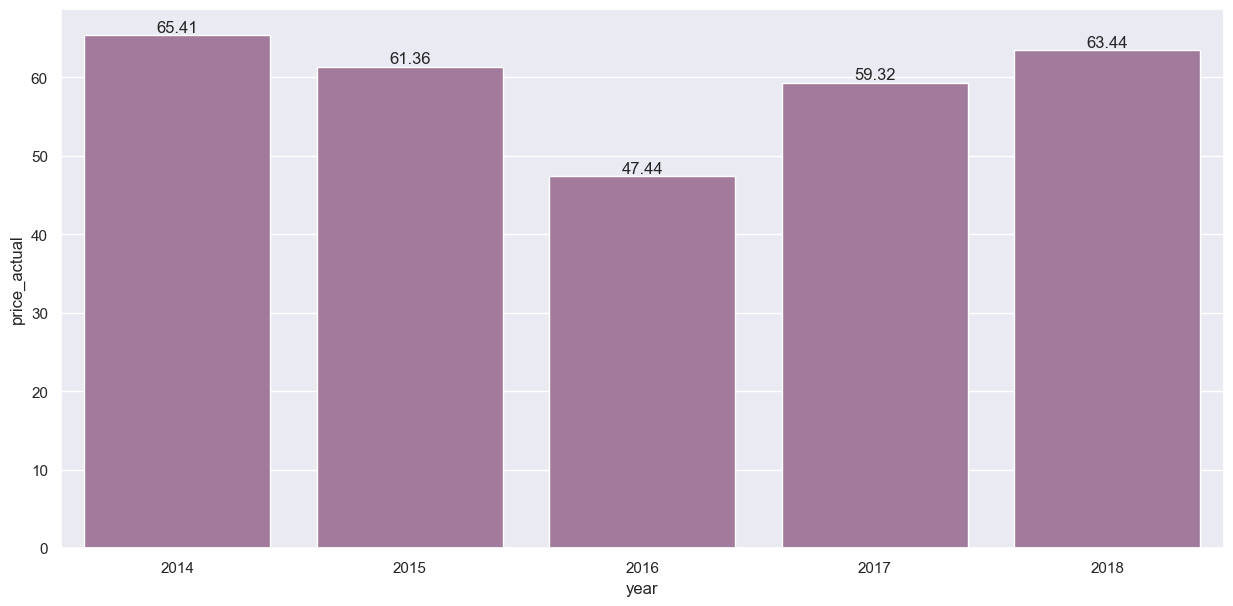

In [13]:
sns.set(style="darkgrid")
plt.figure(figsize=(15, 7))

ax = sns.barplot(
    x="year", 
    y="price_actual", 
    data=energy_df, 
    estimator="mean", 
    ci=None, 
    color='#A774A1')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

In [14]:
def vizualize_scatter_plot(dataframe: pd.DataFrame, selected_column: str) -> None:
    df2016 = dataframe[dataframe["year"] == 2016].sample(n=100, random_state=42)
    df2017 = dataframe[dataframe["year"] == 2017].sample(n=100, random_state=42)
    df2018 = dataframe[dataframe["year"] == 2018].sample(n=100, random_state=42)

    # trace1, trace2 и trace3 должны использовать соответствующие DataFrame
    trace1 = go.Scatter(
        x=df2016[selected_column],
        y=df2016["price_actual"],
        mode="markers",
        name="2016",
        marker=dict(color='rgba(0, 0, 255, 0.8)'),
        text=df2016["date"])
    
    trace2 = go.Scatter(
        x=df2017[selected_column],
        y=df2017["price_actual"],
        mode="markers",
        name="2017",
        marker=dict(color='rgba(0, 255, 0, 0.8)'),
        text=df2017["date"])
    
    trace3 = go.Scatter(
        x=df2018[selected_column],
        y=df2018["price_actual"],
        mode="markers",
        name="2018",
        marker=dict(color='rgba(255, 0, 0, 0.8)'),
        text=df2018["date"])
    
    traces = [trace1, trace2, trace3]
    
    layout = dict(
        xaxis=dict(title=selected_column, zeroline=False),
        yaxis=dict(title='Price Actual', zeroline=False)
    )
    
    fig = dict(data=traces, layout=layout)
    iplot(fig)

column_to_plot_1 = "total_load_actual"
column_to_plot_2 = "total_load_forecast"
vizualize_scatter_plot(dataframe=energy_df, selected_column=column_to_plot_1)

In [15]:
vizualize_scatter_plot(dataframe=energy_df, selected_column=column_to_plot_2)

In [16]:
columns_to_plot = [
    'generation_biomass',
    'generation_fossil_brown',
    'generation_fossil_gas',
    'generation_fossil_hard_coal',
    'generation_fossil_oil',
    'generation_hydro_pumped_storage_consumption',
    'generation_hydro_run_of_river_poundage',
    'generation_hydro_water_reservoir',
    'generation_nuclear',
    'generation_other',
    'generation_other_renewable',
    'generation_solar',
    'generation_waste',
    'generation_wind_onshore',
    'forecast_solar_day_ahead',
    'forecast_wind_onshore_day_ahead',
    'total_load_forecast',
    'total_load_actual',
    'price_day_ahead',
    'price_actual'
]

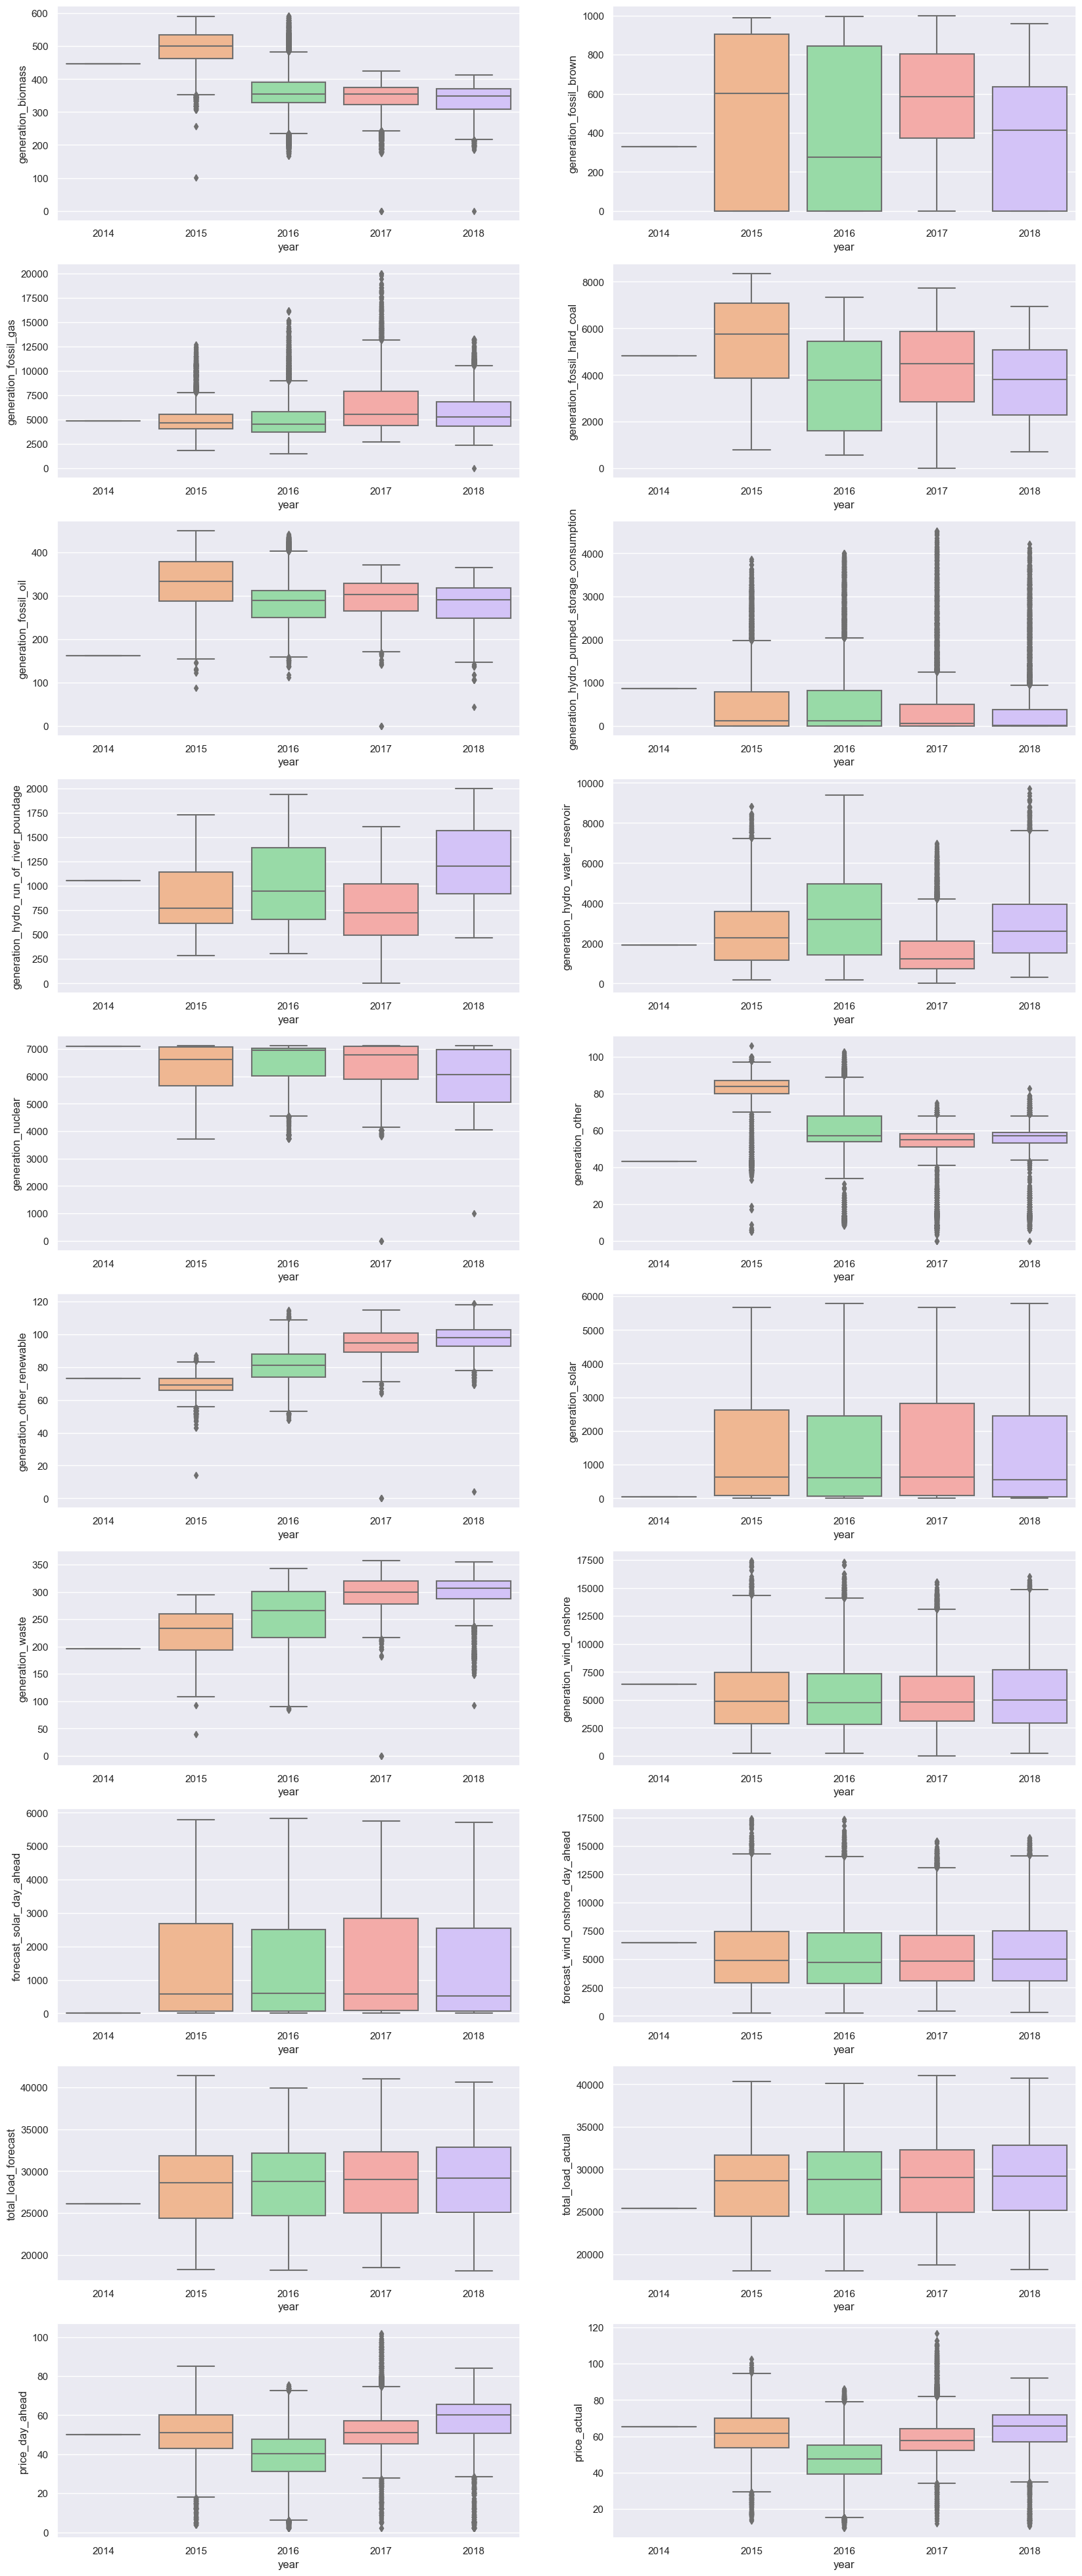

In [17]:
plt.figure(figsize=(20, 50))

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(10, 2, i)
    sns.boxplot(x='year', y=column, data=energy_df, palette='pastel')

plt.show()

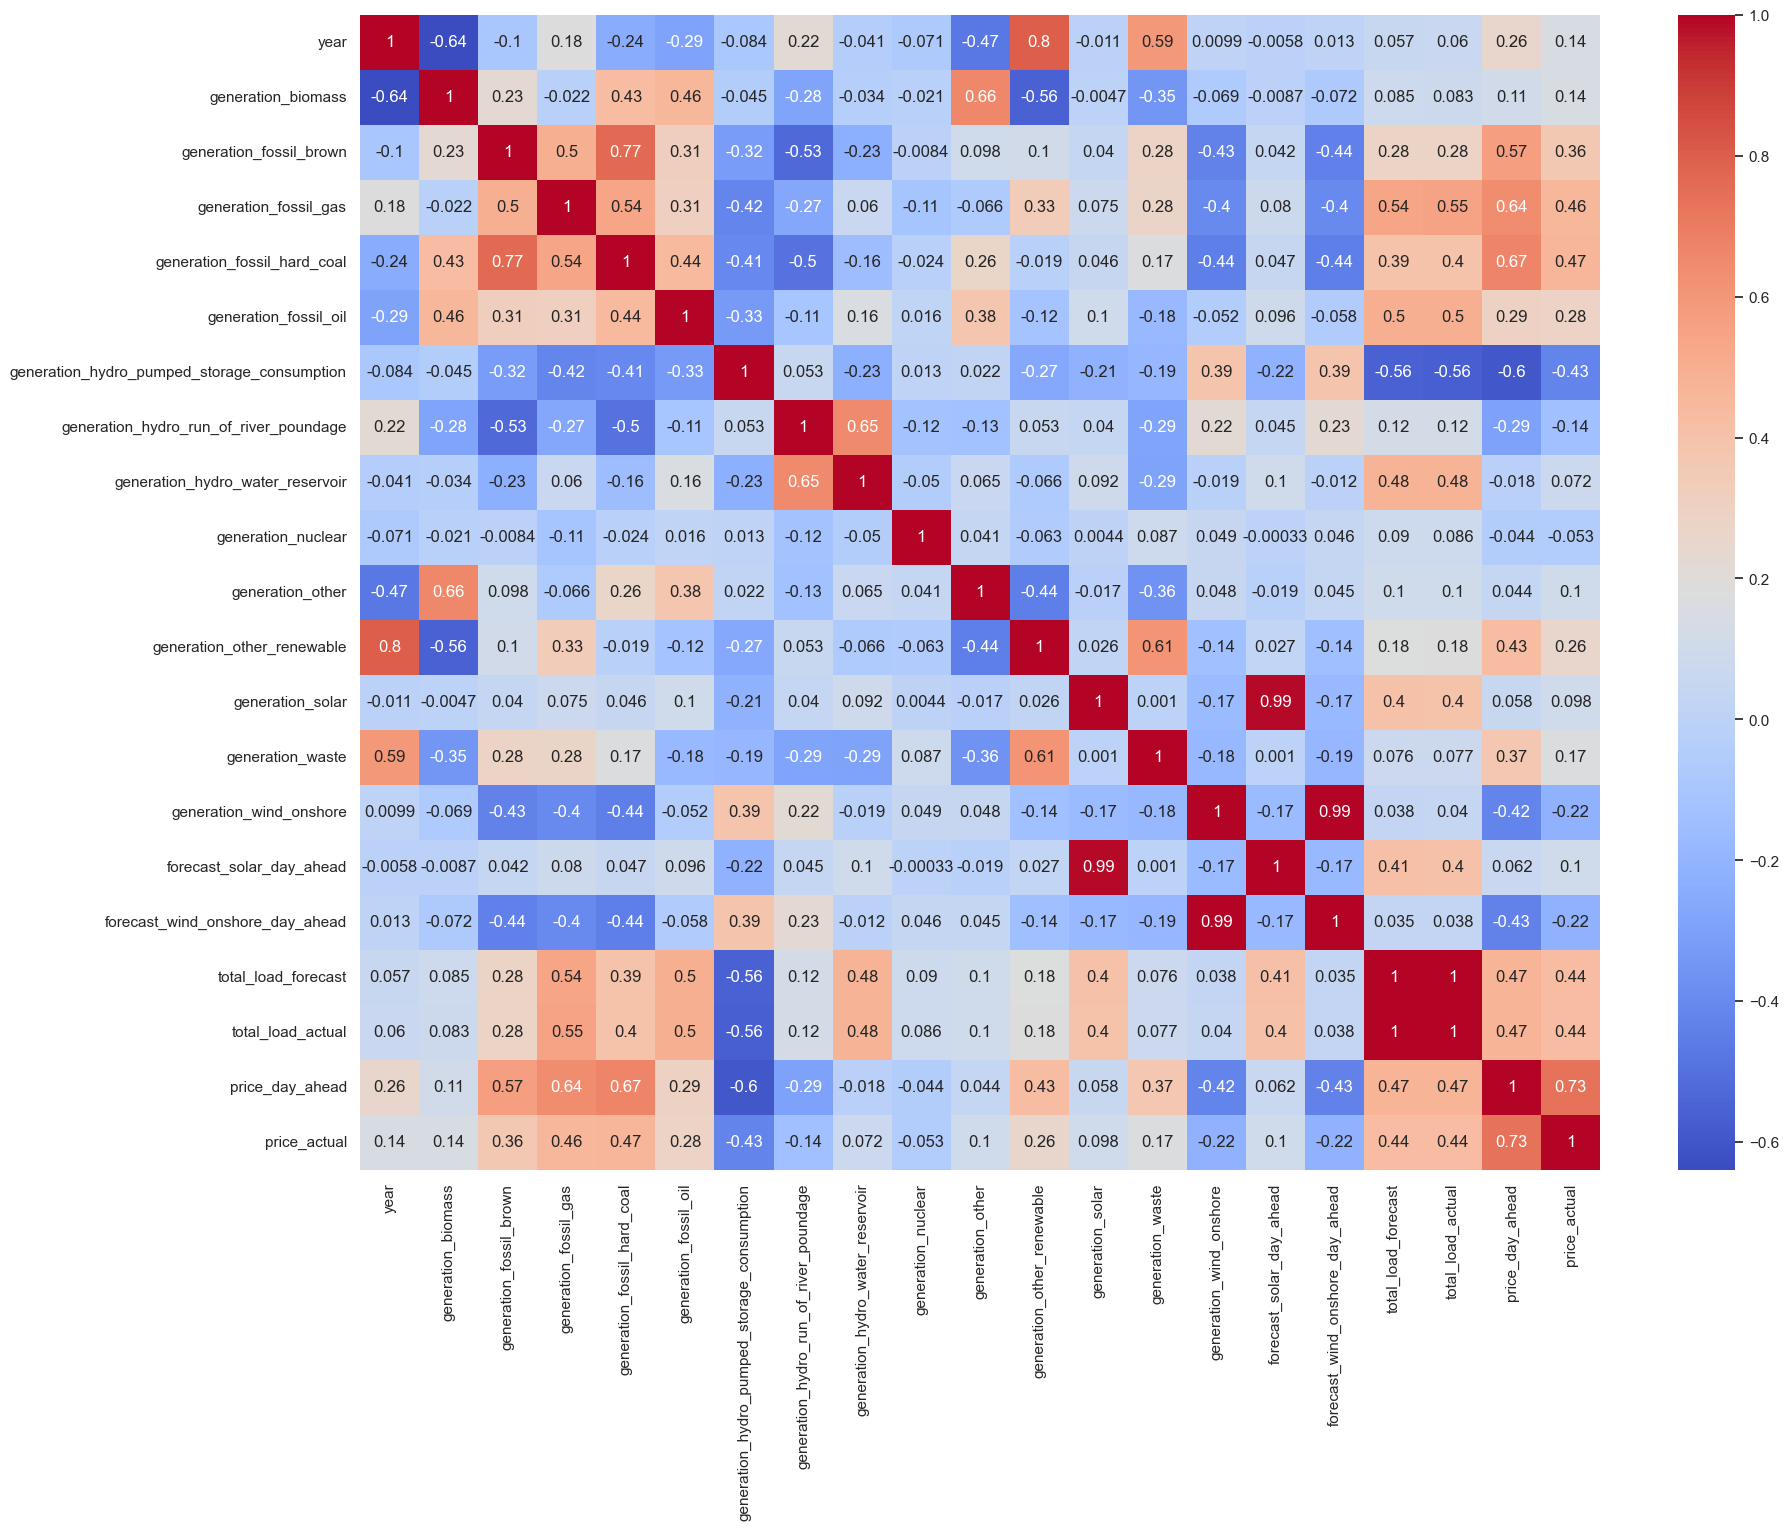

In [18]:
# Heatmap
plt.figure(figsize=(20,15))
sns.heatmap(energy_df.corr(),annot=True,cmap='coolwarm')
plt.show()